In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [22]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
f_len = len(features)

In [23]:
#Это мой вариант считывания данных, ниже находится аналогичный предыдущим лабам
data = pd.read_excel('Dannye_1.xlsx', sheet_name='Данные для питона', index_col=0)
data.columns = features
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121,-0.373212
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951,-0.521242
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612,-0.521242
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011,-0.528291
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785,-0.462500


In [24]:
# подставь свои значения!
# data = pd.read_excel("data.xlsx", sheet_name="sheet_name", index_col=0).loc[:, features]
# data.columns=features
# data.head()

In [25]:
#стандартизация
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121,-0.373212
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951,-0.521242
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612,-0.521242
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011,-0.528291
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785,-0.462500


In [26]:
correlation = scaled_data.corr() #корреляционная матрица
correlation

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,-0.328434,0.717837,0.037041,-0.011260,0.088430,-0.042839,0.183548,-0.342709,-0.151315
x2,-0.328434,1.000000,-0.086028,0.697131,0.114888,-0.063335,0.212093,0.424869,0.691414,0.171459
x3,0.717837,-0.086028,1.000000,0.231706,0.137372,-0.111616,0.068966,0.168973,-0.133866,-0.096152
x4,0.037041,0.697131,0.231706,1.000000,0.163452,-0.152133,0.004120,0.544849,0.490472,0.177011
x5,-0.011260,0.114888,0.137372,0.163452,1.000000,-0.362135,-0.078402,0.163061,-0.096510,-0.034461
x6,0.088430,-0.063335,-0.111616,-0.152133,-0.362135,1.000000,0.072092,-0.039255,0.032160,-0.000521
x7,-0.042839,0.212093,0.068966,0.004120,-0.078402,0.072092,1.000000,0.033985,-0.001701,-0.269317
x8,0.183548,0.424869,0.168973,0.544849,0.163061,-0.039255,0.033985,1.000000,0.062749,0.005379
x9,-0.342709,0.691414,-0.133866,0.490472,-0.096510,0.032160,-0.001701,0.062749,1.000000,0.381331
x10,-0.151315,0.171459,-0.096152,0.177011,-0.034461,-0.000521,-0.269317,0.005379,0.381331,1.000000


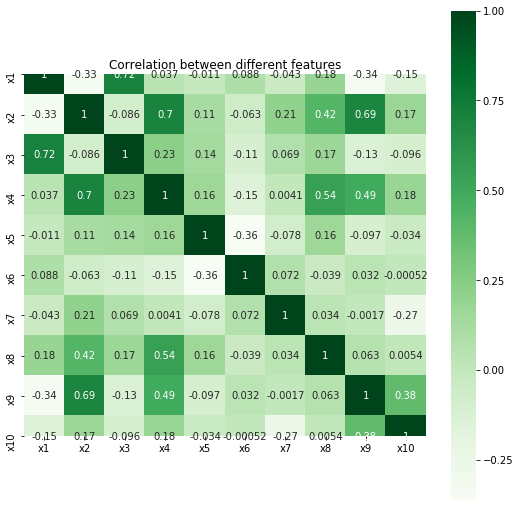

In [27]:
plt.figure(figsize=(9,9)) 
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Greens')
plt.title('Correlation between different features')
plt.show()

In [28]:
# проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [29]:
eigenvalues_sorted

[2.688611046070121,
 2.0498301438433013,
 1.3734849458697787,
 1.2657324796752298,
 0.8318799146526283,
 0.6179517531062351,
 0.5674716251018439,
 0.25469184721437715,
 0.20132874434451262,
 0.14901750012198045]

In [30]:
import math

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R))

chi2_z = chi_2(scaled_data.shape[0], scaled_data.shape[1], correlation)
p_value =sts.chi2.sf(chi2_z, scaled_data.shape[1]* (scaled_data.shape[1]-1) / 2)

if p_value > 0.05:
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


In [31]:
#Доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], scaled_data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], scaled_data.shape[0])

conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

,left_border,eig,right_border
0,2.064305,2.688611,3.854247
1,1.573852,2.049830,2.938525
2,1.054556,1.373485,1.968954
3,0.971825,1.265732,1.814486
4,0.638714,0.831880,1.192538
5,0.474461,0.617952,0.885862
6,0.435703,0.567472,0.813497
7,0.195551,0.254692,0.365112
8,0.154579,0.201329,0.288614
9,0.114415,0.149018,0.213623


In [34]:
# оценка уровня информативности
pc = 2
lmbd = 0

for i in range(pc):
    lmbd = lmbd + eigenvalues_sorted[i]

I = lmbd * 100 / f_len

print('I(x) = {:.3f}%'.format(I))


I(x) = 47.384%


Значение pc выбирается так, чтобы информативность была выше 70% (насколько мы поняли)

In [53]:
# Критерий Кайзера
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")

Гипотеза о достаточности 2 главных компонент принимается


In [54]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues))
eigenvalues_sum = eigenvalues.sum()

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted)
df = pd.DataFrame(
    zip(
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share"]
)
df

,eig,number,variance_share
0,2.688611,1,0.27
1,2.049830,2,0.20
2,1.373485,3,0.14
3,1.265732,4,0.13
4,0.831880,5,0.08
5,0.617952,6,0.06
6,0.567472,7,0.06
7,0.254692,8,0.03
8,0.201329,9,0.02
9,0.149018,10,0.01


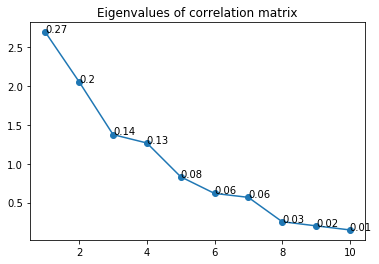

In [55]:
plt.figure(figsize=(6, 4))
plt.title('Eigenvalues of correlation matrix')
plt.plot(df['number'], df['eig'], marker='o')
ax = plt.gca()
df.apply(lambda x: ax.annotate(x['variance_share'], (x['number'], x['eig'])), axis=1)
plt.show()

In [56]:
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share']])], axis=1)
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share']
result

,eig,number,variance_share,cum_eig,cum_variance_share
0,2.688611,1,0.27,2.688611,0.27
1,2.049830,2,0.20,4.738441,0.47
2,1.373485,3,0.14,6.111926,0.61
3,1.265732,4,0.13,7.377659,0.74
4,0.831880,5,0.08,8.209539,0.82
5,0.617952,6,0.06,8.827490,0.88
6,0.567472,7,0.06,9.394962,0.94
7,0.254692,8,0.03,9.649654,0.97
8,0.201329,9,0.02,9.850982,0.99
9,0.149018,10,0.01,10.000000,1.00


In [60]:
# построение главных компонент
pc = 2

u = pd.DataFrame(
    data=np.array([couple_lst[i][1] for i in range(f_len)]).T,
    columns=['Factor_' + str(i + 1) for i in range(f_len)],
    index=features
).iloc[:, :pc]
u

,Factor_1,Factor_2
x1,-0.212628,0.545498
x2,0.558919,-0.003396
x3,-0.056032,0.584392
x4,0.496828,0.273305
x5,0.098075,0.243347
x6,-0.090737,-0.155934
x7,0.034662,0.044706
x8,0.302964,0.362333
x9,0.477102,-0.196452
x10,0.232281,-0.175501


In [61]:
# матрица нагрузок
A = np.diag(np.sqrt(eigenvalues_sorted)) @ u
A.index = features
A

,Factor_1,Factor_2
x1,-0.348646,0.894452
x2,0.800217,-0.004863
x3,-0.065667,0.684882
x4,0.558955,0.307481
x5,0.089452,0.221951
x6,-0.071328,-0.122580
x7,0.026111,0.033677
x8,0.152897,0.182859
x9,0.214074,-0.088148
x10,0.089667,-0.067748


In [62]:
# Матрица индивидуальных значений главных компонент
F = (np.linalg.inv(A.T @ A) @ A.T @ scaled_data.T).T
F.columns = ['PC' + str(i + 1) for i in range(pc)]
F = F.sort_values("PC1", ascending=False)
F

,PC1,PC2
77,5.063729,0.411188
84,5.039357,-1.811656
78,4.098136,0.175108
76,3.207926,-0.402871
75,2.758664,0.532769
...,...,...
39,-1.307519,-0.678789
48,-1.806452,-1.201755
5,-1.869876,-2.039284
45,-2.049857,-0.235663


In [46]:
# выгрузка в файл
F.to_excel('Lab3_python.xlsx')